In [1]:
import os

import numpy as np
import pandas as pd
from datetime import datetime
from pandas import date_range
import matplotlib
%matplotlib inline
pd.set_option('display.max_rows', 500)
script_path = os.getcwd()
# print(script_path)
data_path= os.path.join(script_path, r"..\data\raw\time_series_covid19_vaccine_global.csv")
# print(os.listdir(data_path))
pd_raw_vacc=pd.read_csv(data_path, index_col=False)
pd_raw_vacc.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [2]:
time_idx= pd_raw_vacc['Date'].drop_duplicates()
df_plot = pd.DataFrame({ 'date': time_idx})
df_plot

,date
0,2020-12-14
2,2020-12-15
6,2020-12-16
10,2020-12-17
14,2020-12-18
...,...
250486,2022-06-11
251160,2022-06-12
251834,2022-06-13
252508,2022-06-14


In [3]:
script_path = os.getcwd()
# print(script_path)
data_path= os.path.join(script_path, r"..\data\raw\time_series_covid19_confirmed_global.csv")
# print(os.listdir(data_path))
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179321,179328,179477,179597,179624,179674,179716,179716,179771,179835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275621,275688,275732,275732,275732,275838,275864,275881,275939,275985
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265823,265828,265834,265841,265847,265851,265854,265855,265860,265862
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42156,42572,42572,42572,42572,42572,42572,42572,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99433,99527


              date      India         US    Germany
0       2020-12-14   0.000000   0.000000   0.000000
2       2020-12-15   0.000000   0.000000   0.000000
6       2020-12-16   0.000000   0.000000   0.000000
10      2020-12-17   0.000000   0.000000   0.000000
14      2020-12-18   0.000000   0.000000   0.000000
...            ...        ...        ...        ...
250486  2022-06-11  64.454870  67.214137  77.648610
251160  2022-06-12  64.526894  67.221918  77.648610
251834  2022-06-13  64.588144  67.225882  77.650401
252508  2022-06-14  64.661649  67.238153  77.652857
253182  2022-06-15  64.731302  67.273059  77.655757

[549 rows x 4 columns]


<AxesSubplot:xlabel='date'>

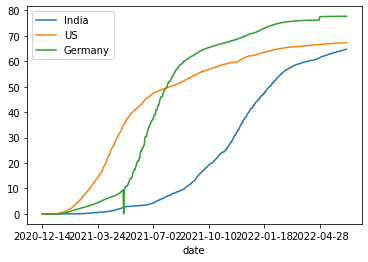

In [4]:

Country_list = ["India", "US", "Germany"]

for each in Country_list:
    f = pd_raw_vacc[pd_raw_vacc["Country_Region"] == each].iloc[:,[1,4]]
    final =f.dropna().set_index('Date')
    adddates= pd.date_range(df_plot.loc[0].at['date'],df_plot.iloc[-1].at['date'])
    final.index = pd.DatetimeIndex(final.index)
    s = final.reindex(adddates, fill_value=0)
    df_plot[each]=np.array(s)


df_plot['India']=df_plot['India']*(100/1393409038)
df_plot['US']=df_plot['US']*(100/329824950)
df_plot['Germany']=df_plot['Germany']*(100/83100000)



print(df_plot)

%matplotlib inline
df_plot.set_index('date').plot()

# s = final.reindex(adddates, fill_value=0)
# s

#
#
#     df_plot[each]=np.array(pd_raw_vacc[pd_raw_vacc["Country_Region"] == each].iloc[:,4:5])
#
# # df_plot.set_index('date').plot()
# df_plot